## This is the workbook for Pepperwood Climate Above Ground research
## Author Aji John

Research Proposal - Climate Above Ground Pepperwood

	Introduction .Climate above ground plays an important role in flora and fauna of a particular region. 
    We plan to explore vertical profiles to complement the wireless mesh and hobo networks, and particularly,
    to study the temperatures experienced by plants of different sizes.
	
	Objectives and Research Questions. We propose to study the following 
    1) Diurnal variation of temperatures at various heights 
    2) Relate the species found at these sites. 
	
	Methods.We plan to carry out in various phases. 
    First, we install iButtons/HOBOs at few of the test sites at different heights 
    to validate the future setup and installation, then, 
    we analyze the data from the initial setup to corroborate our objectives, 
    and finally, we install customized nodes to do long-term monitoring of the sites.

## To visualize temperature profile
Temperature probes at various heights 

In [1]:
# Load the Required Packages
library(raster)
library(leaflet)
library(jsonlite)
library(dplyr)
library(ggplot2)
library(plotly)
library(reshape2)

Loading required package: sp

Attaching package: ‘dplyr’

The following objects are masked from ‘package:raster’:

    intersect, select, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:raster’:

    select

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
# Get the metadata of the plots (comparision)
myurl <- "https://raw.githubusercontent.com/ajijohn/geiger/master/data/shield-comparison.txt"
download.file(url=myurl, destfile="./data/ArrayPlotPts.csv", method="wget")
ArrayPlotPts<- read.csv('./data/ArrayPlotPts.csv')
str(ArrayPlotPts)

'data.frame':	85 obs. of  4 variables:
 $ time   : Factor w/ 85 levels "2016/9/8 16:12:31",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ id     : Factor w/ 5 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 4 2 5 1 3 ...
 $ celsius: num  27.4 23.8 24.9 25.1 25.2 ...
 $ farenh : num  81.3 74.8 76.9 77.2 77.5 ...


Looking at two day data collected in SF for testing. On 9-13, 
no temperature shields , On 9-14,  temperature shields on (commercial ones). 
Would be interesting to see if there are greater temperature variations on 9-13 ?

'data.frame':	8282 obs. of  4 variables:
 $ time   : Factor w/ 8282 levels "2016/9/12 15:56:41",..: 1 2 3 4 5 6 7 10 11 12 ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...
'data.frame':	8282 obs. of  4 variables:
 $ time   : POSIXct, format: "2016-09-12 15:56:41" "2016-09-12 15:56:44" ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...


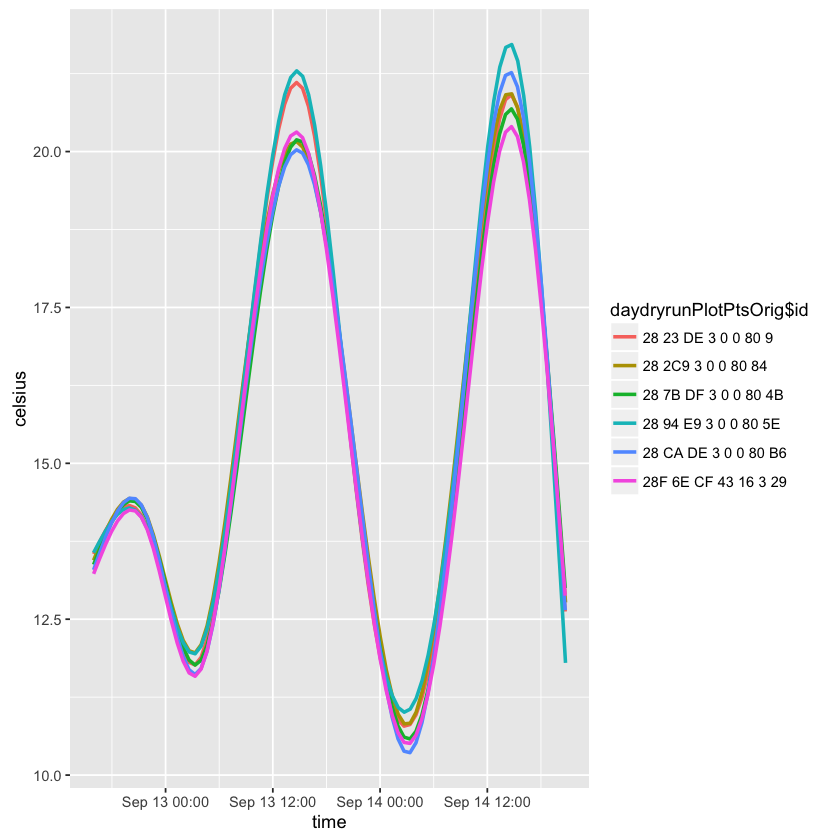

In [3]:
# Get the metadata of the plots (comparision)
myurl <- "https://raw.githubusercontent.com/ajijohn/geiger/master/data/2daydryrun.csv"
download.file(url=myurl, destfile="./data/daydryrun.csv", method="wget")
daydryrunPlotPtsOrig<- read.csv('./data/daydryrun.csv')
str(daydryrunPlotPtsOrig)

daydryrunPlotPtsOrig$time <-as.POSIXct(strptime(daydryrunPlotPtsOrig$time, "%Y/%m/%d %H:%M:%S"))
str(daydryrunPlotPtsOrig)
ggplot(daydryrunPlotPtsOrig, aes(time,celsius, color = daydryrunPlotPtsOrig$id)) + stat_smooth(se = FALSE) 

In [4]:
# Get the metadata of the plots (comparision)
#myurl <- "https://raw.githubusercontent.com/ajijohn/geiger/master/data/2-day-dryrun.txt"
#download.file(url=myurl, destfile="./data/daydryrun.csv", method="wget")
daydryrunPlotPts<- read.csv('./data/2-day.csv')
str(daydryrunPlotPts)
#format the date
daydryrunPlotPts$time <-as.POSIXct(strptime(daydryrunPlotPts$time, "%m/%d/%y %H:%M"))
str(daydryrunPlotPts)

'data.frame':	8282 obs. of  4 variables:
 $ time   : Factor w/ 1734 levels "9/12/16 15:56",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...
'data.frame':	8282 obs. of  4 variables:
 $ time   : POSIXct, format: "2016-09-12 15:56:00" "2016-09-12 15:56:00" ...
 $ id     : Factor w/ 6 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 6 4 2 5 1 ...
 $ celsius: num  14.8 14.7 15.2 14.8 14.6 ...
 $ farenh : num  58.5 58.4 59.5 58.7 58.3 ...


Lets look at iButton Data collected in front of Bechtel house 

In [5]:
#format the date
ArrayPlotPts$time <-as.POSIXct(ArrayPlotPts$time, "%Y/%m/%d %H:%M:%S")
str(ArrayPlotPts)

Warning message in strptime(xx, f <- "%Y-%m-%d %H:%M:%OS", tz = tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(x):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in strptime(xx, f <- "%Y/%m/%d %H:%M:%OS", tz = tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(x):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in strptime(x, f, tz = tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(as.POSIXlt(x, tz, ...), tz, ...):
“unknown timezone '%Y/%m/%d %H:%M:%S'”

'data.frame':	85 obs. of  4 variables:
 $ time   : POSIXct, format: 

Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”

"2016-09-08 16:12:31" "2016-09-08 16:12:34" ...
 $ id     : Factor w/ 5 levels "28 23 DE 3 0 0 80 9",..: 4 2 5 1 3 4 2 5 1 3 ...
 $ celsius: num  27.4 23.8 24.9 25.1 25.2 ...
 $ farenh : num  81.3 74.8 76.9 77.2 77.5 ...


In [6]:
levels(ArrayPlotPts$id) <- c('Exposed 1','Inhouse Shield','Exposed 2','Exposed 3','Commercial Shield')

#Lets look as an ancillary data about shields

Warning message in as.POSIXlt.POSIXct(x):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXlt.POSIXct(x):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(from):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(from):
“unknown timezone '%Y/%m/%d %H:%M:%S'”Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone '%Y/%m/%d %H:%M:%S'”

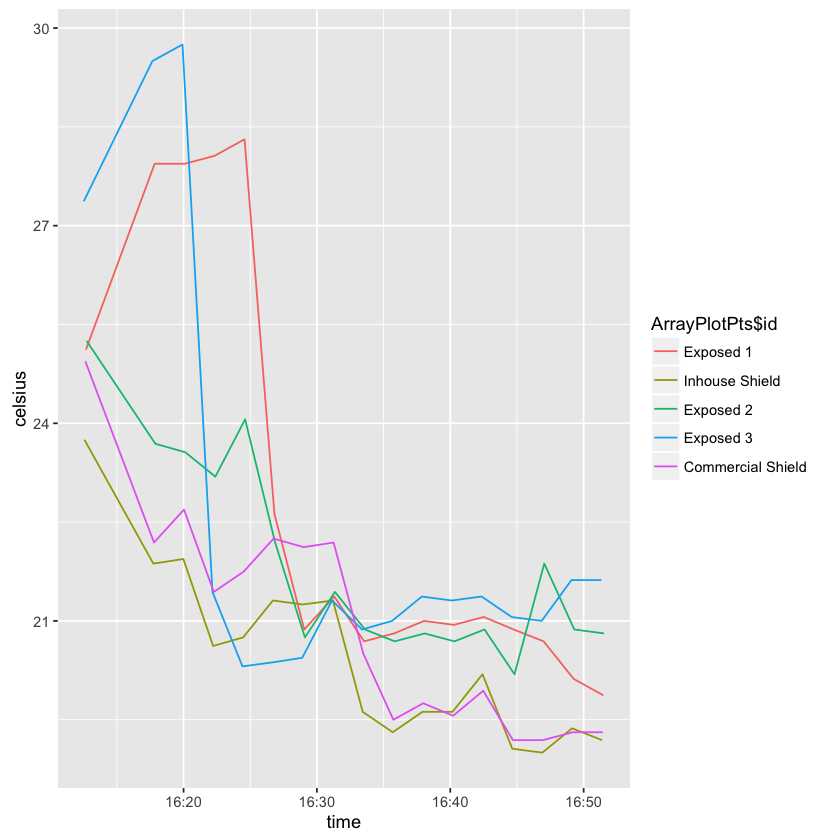

In [10]:
ggplot(ArrayPlotPts, aes(time,celsius, color = ArrayPlotPts$id)) + geom_line()



In [9]:
# iButton at three different heights
Bechtelibut<- read.csv('./data/Bechtelibut.csv')
str(Bechtelibut)

#daydryrunPlotPtsOrig$time <-as.POSIXct(strptime(daydryrunPlotPtsOrig$time, "%Y/%m/%d %H:%M:%S"))
#str(daydryrunPlotPtsOrig)
#ggplot(daydryrunPlotPtsOrig, aes(time,celsius, color = daydryrunPlotPtsOrig$id)) + stat_smooth(se = FALSE) 

'data.frame':	6144 obs. of  4 variables:
 $ Time         : Factor w/ 4096 levels "2016-07-21 18:21:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TempC        : num  26 23.5 23 23 23 23 23 23 23 23 ...
 $ Serial.number: Factor w/ 3 levels "6900000038A32F21",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ ID           : Factor w/ 3 levels "height-1","height-2",..: 3 3 3 3 3 3 3 3 3 3 ...


In [12]:
Bechtelibut$Time <- as.POSIXct(Bechtelibut$Time, "%Y-%m-%d %H:%M:%S")

Warning message in strptime(xx, f <- "%Y-%m-%d %H:%M:%OS", tz = tz):
“unknown timezone '%Y-%m-%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(x):
“unknown timezone '%Y-%m-%d %H:%M:%S'”Warning message in strptime(x, f, tz = tz):
“unknown timezone '%Y-%m-%d %H:%M:%S'”Warning message in as.POSIXct.POSIXlt(as.POSIXlt(x, tz, ...), tz, ...):
“unknown timezone '%Y-%m-%d %H:%M:%S'”

In [32]:
#str(Bechtelibut)

Bechtelibut$time <-as.POSIXct(strptime(Bechtelibut$Time, "%Y-%m-%d %H:%M:%S"))

Warning message in as.POSIXlt.POSIXct(x, tz):
“unknown timezone '%Y-%m-%d %H:%M:%S'”

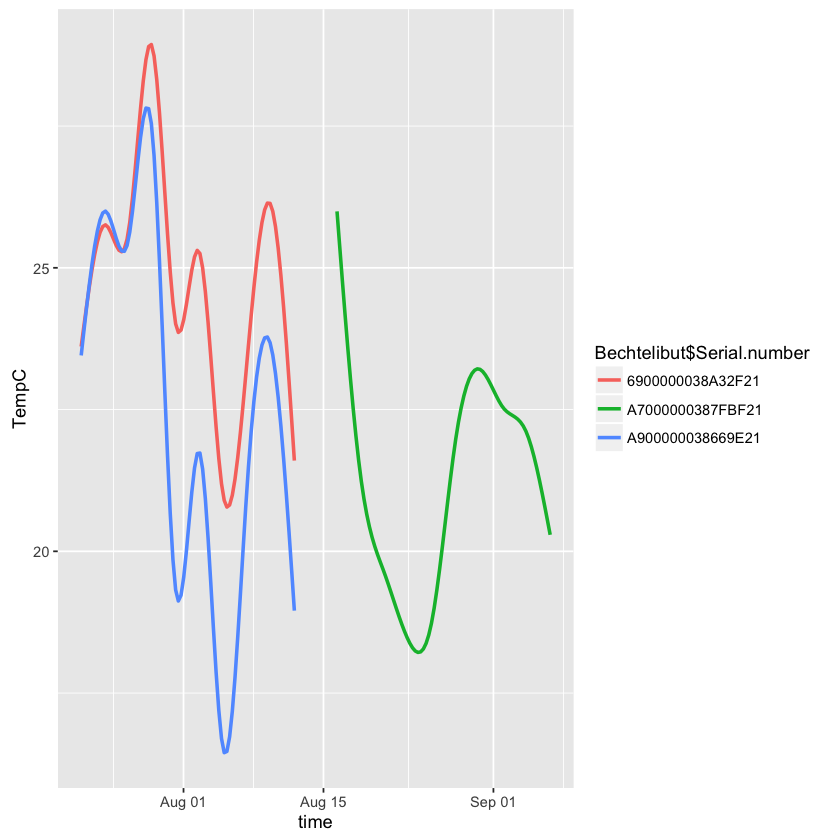

In [38]:
ggplot(Bechtelibut, aes(time,TempC, color = Bechtelibut$Serial.number)) + stat_smooth(se = FALSE) 

Lets see in detail

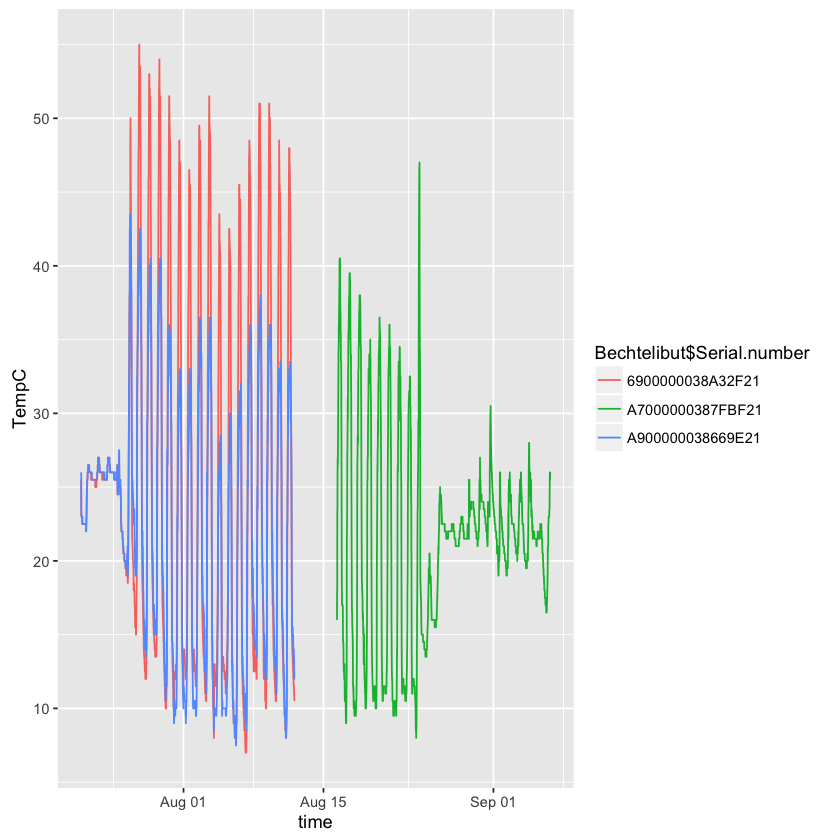

In [46]:
ggplot(Bechtelibut, aes(time,TempC, color = Bechtelibut$Serial.number)) + geom_line()  

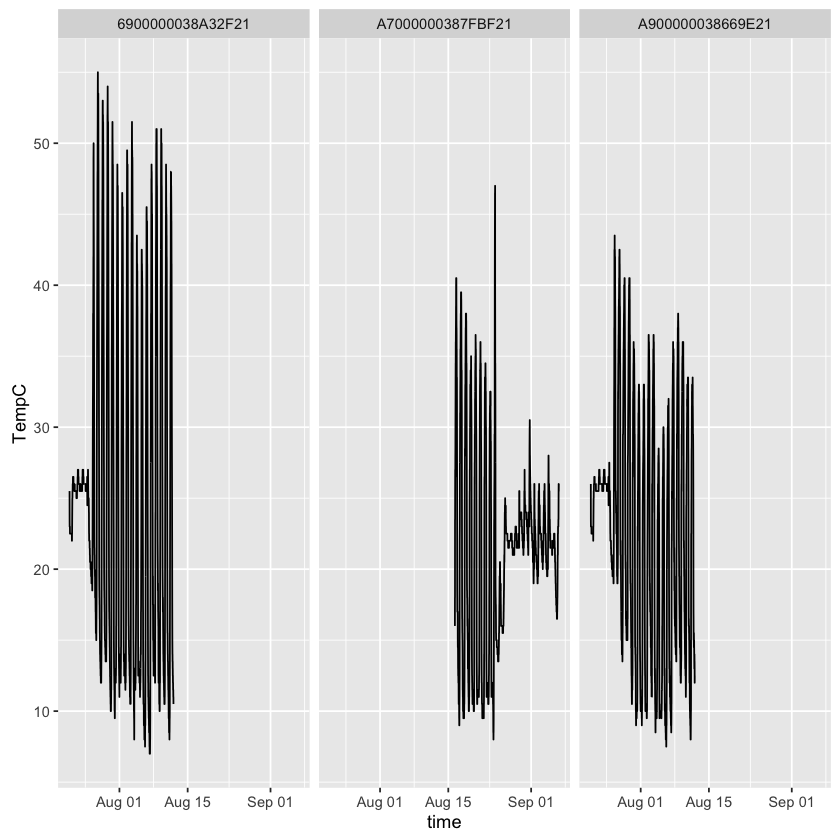

In [53]:
p <- ggplot(data = Bechtelibut, aes(x = time, y = TempC)) + geom_line()
p + facet_wrap(~Serial.number)